In [57]:
%matplotlib inline

In [44]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import json

In [2]:
# import data

# fileName = './sample.json'
fileName = './../data/DMT_tags_vectors.json'

data = []
with open(fileName) as f:
    for line in f:
        data.append(json.loads(line))

In [4]:
# get vectors of each data
vectors = [];
pageIds = [];
pageTitles = [];
for page in data:
    vectors.append(page["vector"])
    pageIds.append(page["pageId"])
    pageTitles.append(page["pageTitle"])

In [5]:
# convert to np arrays
np_vectors = np.array(vectors)
np_pageIds = np.array(pageIds)
np_pageTitles = np.array(pageTitles)

## Kmeans

In [13]:
# model
numClusters = 10
kmeans = KMeans(n_clusters=numClusters)
kmeans = kmeans.fit(np_vectors)
kmeans_labels = kmeans.predict(np_vectors)

In [14]:
indices = kmeans_labels == 0
np_pageTitles[indices]

array(['Data Management Tools', 'Requesting Client Data',
       'When to Partition Load Customer Attributes',
       'Product Debugging - Data Setup Issues',
       'Finding Tables, Views, and Other Objects in SQL',
       'Common Client Instance Error Handling',
       'Creating and Updating Groups', 'How To Develop a Procedure',
       'Creating and Updating Attributes', 'Swapping', 'Rolling Up Data',
       'Updating Direct Mapping Tables', 'Archiving',
       'Loading Entity Instance Master Tables',
       'Typed to Base-Level Staging',
       'Loading MET&L Entity Instance Master Tables',
       'Creating and Loading Transaction ID Generators',
       'Creating Metric-Based and Meff-Based Attributes on the Back-End',
       'Creating and Updating Transaction Attributes',
       'How Many Partitions to Have in Financial Tables',
       'Checklist: Instance Structure Plan',
       'Personally Identifiable Information (PII)',
       'Organizing a Client Instance',
       'How to Tal

In [16]:
indices = kmeans_labels == 9
np_pageTitles[indices]

array(['How to Setup Import Review', 'FAQs',
       'Offsite 2018 Goals Tracking', '2018/04/23 Kickoff',
       'DA Office Hours', 'Final Presentations',
       'Updating Applicable Start and End Dates', 'Code Reviewer List',
       'Typed to Master', 'SQL & Other Software versions',
       'Import Automation', 'Data Team Project Management',
       'Vertical: Restaurants', 'Training Schedules', 'Stored Procedures',
       'New Data Sets to Pursue', 'Cross-Office Training',
       'APT Software Modules Training for DAs - 2017',
       'SmartSQL Tasks - RollUps', 'Data Training Videos',
       'Analytic Impacts of Metric Setup', 'Kicking Off a Loop',
       'Vertical: Consumer Packaged Goods'], dtype='<U83')

## PCA

In [45]:
from sklearn import decomposition


In [46]:
pca = decomposition.PCA(n_components=3)
pca.fit(np_vectors)
pca_vectors = pca.transform(np_vectors)

In [47]:
print(pca_vectors[0])

[0.34460558 0.07493178 0.00487911]


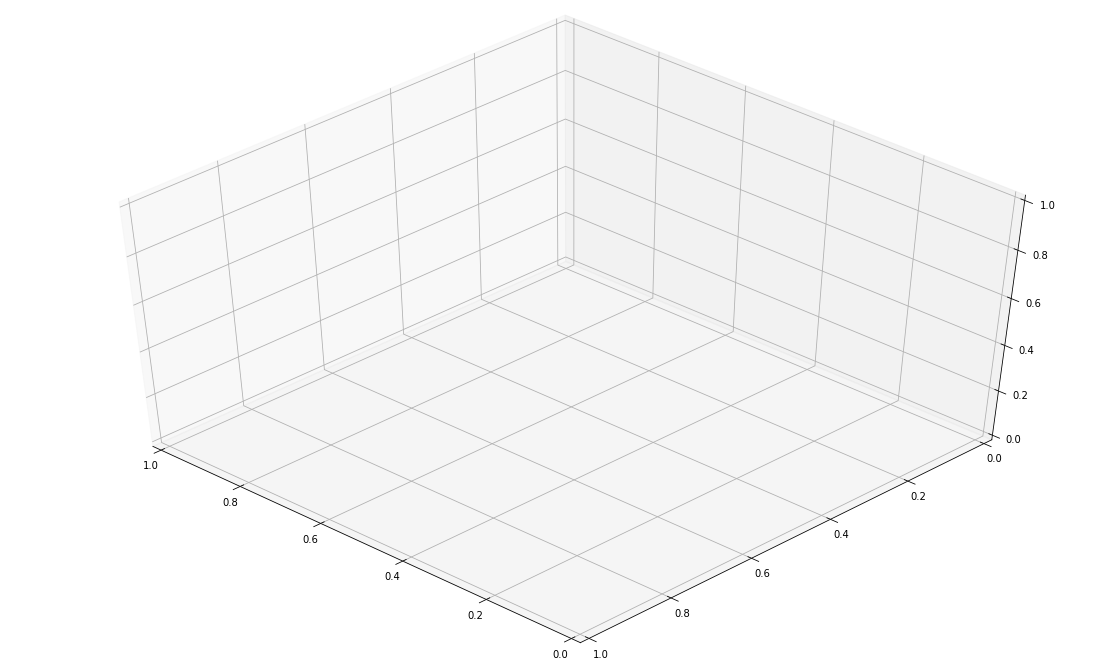

In [48]:
fig = plt.figure(1, figsize=(16, 9))
plt.clf() # Clear current figure 
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla() # Clear current axis


In [58]:
ax.scatter(pca_vectors[:, 0], pca_vectors[:, 1], pca_vectors[:, 2], c=np.ones(len(np_pageTitles)),
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

[]

In [61]:
plt.show();

'module://ipykernel.pylab.backend_inline'